In [1]:
from tic_tac_toe import UltimateBoard
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%pylab inline

colors=['#547fc4']

Populating the interactive namespace from numpy and matplotlib


In [8]:
def sim_game(i):
    x_turn = i % 2 == 0
    board = UltimateBoard(x_turn)
    turns = 0
    
    while not board.game_over:

            lab = 'X' if x_turn else 'O'
            brd = np.random.choice(list(board.active_boards), size=1)[0]
            pos = np.random.choice(list(board.boards[brd].remaining_squares), size=1)[0]
            
#             print(brd, pos, lab)
            board.play(brd, pos, lab)

            x_turn = not x_turn
            turns += 1
            
    return board.winner, turns

In [3]:
from time import time

In [ ]:
tic = time()
res_list = [sim_game(i) for i in range(1000)]
print(time() - tic)

In [6]:
from multiprocessing import Pool

In [9]:
tic = time()
p = Pool(4)
res = p.map(sim_game, range(10000))
print(time() - tic)




14.520046949386597


# Analyze Results

In [10]:
df = pd.DataFrame(res, columns=['winner','turns'])

Text(0.5,1,'Distribution of Number of Turns')

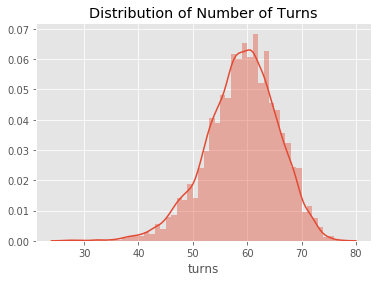

In [11]:
sns.distplot(df['turns'])
plt.title("Distribution of Number of Turns")

In [12]:
df['turns'].min(), df['turns'].mean(), df['turns'].max()

(27, 58.8916, 77)

In [13]:
100 * df['winner'].value_counts() / df.shape[0]

O      39.0
X      39.0
Cat    22.0
Name: winner, dtype: float64

Text(0.5,1,'Distribution of Winners - Second Run')

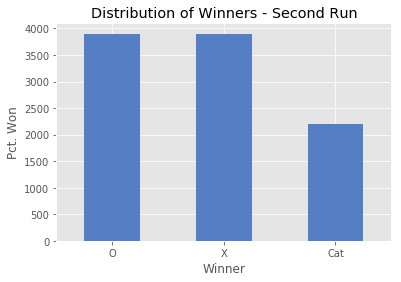

In [14]:
df['winner'].value_counts().plot(kind='bar', color=colors[0])
plt.xticks(rotation=360)
plt.xlabel("Winner")
plt.ylabel("Pct. Won")
plt.title("Distribution of Winners - Second Run")